(RnD)=
# Conjunto R&D
```{figure} ./../../figuras/lhco-RnD.png
---
name: RnD-RnD
figclass: margin
---
Diagrama de Feynmann para la señal.
```
Como se mencionó en la {numref}`lhco-datos`, el conjunto R&D posee 1,000,000 de eventos de fondo y 100,000 de señal (aproximadamente 9.09% de los eventos son señal). La señal se trata de $Z'\rightarrow XY$ con $X\rightarrow q\bar{q}$ y $Y\rightarrow q\bar{q}$. Con masas de 3.5 TeV, 500 GeV y 100 GeV para *Z'*, *X* y *Y*, respectivamente.

El archivo R&D publicado por las LHCO 2020 es de la siguiente forma:

```{table} Estructura del conjunto de datos R&D. Cada fila es un evento y la última columna hace referencia a si el evento es de fondo (0) o de señal (1).
:name: RnD-rawdataframe
|Evento   |$pT$     | $\eta$  | $\phi$  | $pT$    | $\eta$  | $\phi$  | $\cdots$| señal |
|---------|---------|---------|---------|---------|---------|---------|---------|-------|
| 1       | $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 1.0   |
| 2       | $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 0.0   |
| $\vdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 0.0   |
```
Este conjunto de datos tiene 1,100,000 eventos. Cada 3 columnas representan el $p_T$, $\eta$ y $\phi$ de un hadrón, con relleno de ceros hasta 700 hadrones. Por lo tanto los datos se encuentran organizados en una tabla de $1,100,000\times2101$, tomando en cuenta la columna de señal.

A continuación se va a presentar un análisis de los datos. Para ello utilizaremos 100,000 eventos del conjunto de datos. 

(RnD-raw)=
## Datos crudos
Al cargar los datos en una tabla se ven de la siguiente forma,

In [1]:
# Importamos las librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

# Funciones de benchtools
from benchtools.src.plotools import bkg_sig_hist, bkg_sig_scatter
from benchtools.src.clustering import build_features

In [2]:
# Cargamos 100,000 eventos
path_data = "../../../datos/events_anomalydetection.h5"
df = pd.read_hdf(path_data, stop=100000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.324101,-0.361158,2.737669,0.409859,-2.429939,0.729830,0.867922,-2.267777,-1.161310,0.383031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.646304,-0.539460,-1.386258,0.471293,-1.636572,0.751657,0.453769,-1.099593,-0.393405,0.485929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.325172,-0.833948,2.404844,1.295058,-2.089618,-1.873342,0.451272,-0.101877,2.217348,0.461293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290918,-2.200063,1.630132,0.565028,-1.714345,-2.617103,0.951042,-0.532720,2.941473,0.896248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.526330,-2.349110,-1.745532,0.542491,-2.080352,-3.044045,0.390727,-1.278563,-2.131058,2.530358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Calculamos la proporción de señal
df_sig = df[df.iloc[:,-1]==1]    # Última columna es señal
ratio_sig = df_sig.shape[0]*100/df.shape[0]
# Guardamos el valor en el notebook
glue("RnD-ratio", ratio_sig, display=False)

La proporción de señal en este subconjunto de 100,000 eventos es del {glue:text}`RnD-ratio:.2f`%. Cada evento tiene una cantidad distinta de hadrones,

In [4]:
# Eliminamos la señal para evitar contar los hadrones
ns_df = df.iloc[:,:-1]  

# Contamos los valores de pT distintos de cero
df['n_hadrons'] = ns_df.iloc[:,::3].gt(0).sum(axis='columns')

# Imprimimos para los primeros 5 eventos    
for event in range(5):
    print("Número de hadrones en el evento {}: {}".format(event, df.loc[event,'n_hadrons']))

Número de hadrones en el evento 0: 109
Número de hadrones en el evento 1: 208
Número de hadrones en el evento 2: 196
Número de hadrones en el evento 3: 183
Número de hadrones en el evento 4: 169


Graficando las distribuciones de las variables podemos lograr una mejor idea del contenido los datos. Por ejemplo, podemos ver la distribución del número de hadrones para eventos de señal y de fondo.

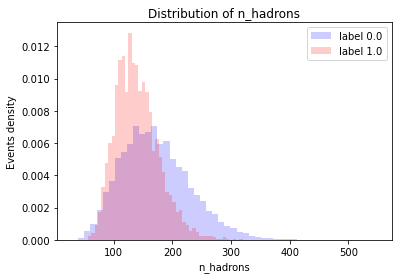

In [5]:
# Graficamos utilizando benchtools
bkg_sig_hist(df, variable='n_hadrons', label=2100) # label=2100 porque esa es la columna de señal
plt.show()

In [6]:
# Separamos la señal del fondo
df_sig = df[df.iloc[:,-2]==1]   # -2 porque agregamos columna de n_hadrons
df_bkg = df[df.iloc[:,-2]==0] 

# Calculamos la media
mean_had_sig = df_sig.loc[:,'n_hadrons'].mean()
mean_had_bkg = df_bkg.loc[:,'n_hadrons'].mean()

# Guardamos los valores en el notebook
glue('RnD-mean_had_sig', mean_had_sig, display=False)
glue('RnD-mean_had_bkg', mean_had_bkg, display=False)

La distribución del número de hadrones de los eventos de fondo es más ancha y con una media de {glue:text}`RnD-mean_had_bkg:.0f` con menor densidad de eventos. La distribución de la señal es mas angosta con una media de {glue:text}`RnD-mean_had_sig:.0f`. Esto quiere decir que los eventos de señal tienden a tener menos hadrones.

Graficamos también también las distribuciones del promedio de $p_T$, $\eta$ y $\phi$ de los hadrones de cada evento, para todos los eventos.

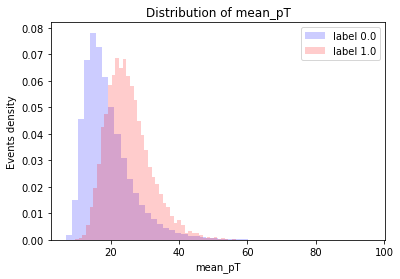

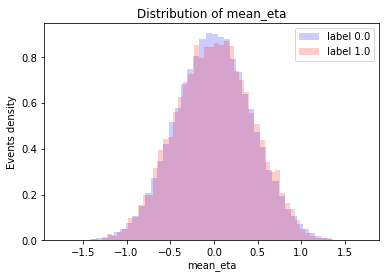

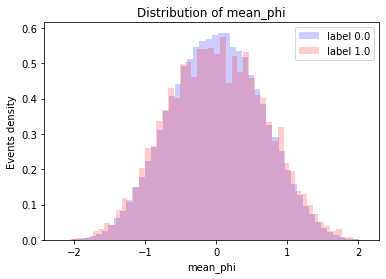

In [7]:
# Cada 3 valores es pT, cada 3 empezando por 1 es eta 
# y cada 3 empezando por 2 es phi.
# Remplazamos los ceros con NaN para poder utilizar .mean()

pt_df = ns_df.iloc[:,::3].replace(0, np.NaN)
eta_df = ns_df.iloc[:,1::3].replace(0, np.NaN)
phi_df = ns_df.iloc[:,2::3].replace(0, np.NaN)

# Calculamos la media de cada evento
df['mean_pT'] = pt_df.mean(axis=1)
df['mean_eta']= eta_df.mean(axis=1)
df['mean_phi']= phi_df.mean(axis=1)

# Graficamos cada variable
variables = ['mean_pT', 'mean_eta', 'mean_phi']
for variable in variables:
    bkg_sig_hist(df, variable, label=2100)
    plt.show()

Existe una diferencia entre la distribución de $p_T$ del fondo y de la señal. En general, los eventos de fondo parecen tener menor $p_T$ que los eventos de señal. Las variables $\eta$ y $\phi$ están distribuidas normalmente en los eventos de señal y de fondo.

A continuación agruparemos los jets y observaremos la distribución de las variables.

(RnD-jets)=
## Datos pre-procesados
Los datos pre-procesados de los primeros 100,000 eventos se obtienen utilizando `build_features` de `benchtools.src.clustering`, que utiliza la librería `pyjet`. Los detalles de este pre-procesamiento se encuentran en la {numref}`bench-pre`. 

Los datos de los jets agrupados que se obtienen del pre-procesamiento son de la siguiente forma,

In [8]:
# Esta celda se corre una vez para pre-procesar los datos
# Una vez que el archivo existe no vuelve a correr
build_features(path_data=path_data, nbatch=2, outname='RnD-100000', outdir='../../../datos/', chunksize=50000)

A file with that name already exists


In [9]:
# Importamos los datos pre-procesados
df = pd.read_csv("../../../datos/RnD-100000.csv")
df.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,m_jj,deltaR_j12,n_hadrons,label
0,1286.727685,106.912129,0.185508,-2.763676,1313.290435,0.624659,36,1283.220733,63.164215,0.064989,0.393688,1287.481934,0.713248,33,2580.489568,3.159663,109.0,0.0
1,1354.394070,614.269108,0.826505,1.365524,1943.559886,0.311688,84,1325.613761,439.064150,-0.874319,-1.786248,1916.370744,0.276881,97,3859.315047,3.581406,208.0,0.0
2,1214.955723,645.865619,-0.196786,2.040545,1396.840654,0.238205,119,1072.462085,113.768840,0.143831,-1.090330,1089.530630,0.726963,59,2480.769725,3.149348,196.0,0.0
3,1285.227873,516.835248,0.328693,2.975321,1450.485926,0.013429,65,1220.251279,174.796077,0.294854,-0.322661,1285.618789,0.706361,89,2609.893413,3.298155,183.0,0.0
4,1210.415787,129.499352,-0.744836,-2.883347,1567.345300,0.423550,54,1091.785816,155.362262,1.060534,0.264977,1772.340209,0.787662,57,3313.488835,3.629229,169.0,1.0


Estas variables son las que se van a utilizar para entrenar los modelos de aprendizaje automático. 

### Distribuciones
Algunas variables poseen distribuciones diferentes para los eventos de señal y de fondo.

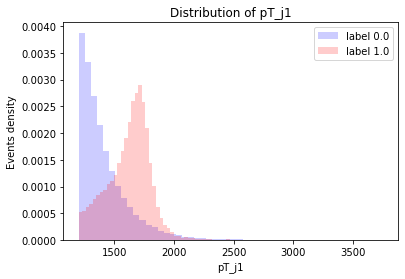

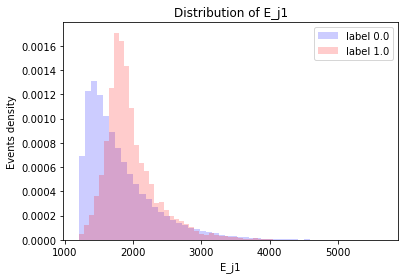

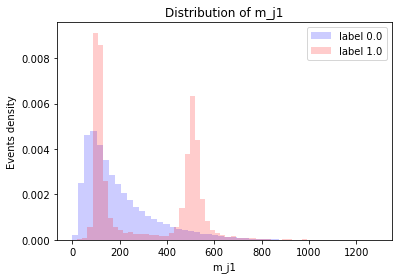

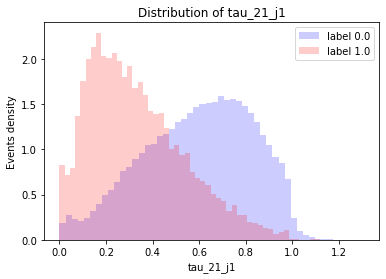

In [10]:
for variable in ['pT_j1','E_j1', 'm_j1','tau_21_j1']:
    bkg_sig_hist(df, variable=variable, label='label')
    plt.show()

Se observa que el $p_T$ del fondo decae suavemente, indicando que los jets más energéticos de eventos de QCD tienden a tener un momento transverso menor a 1500 GeV. Los jets más energéticos de los eventos de señal poseen un $p_T$ mayor, entre 1500 y 2000 GeV. 

Esto también se observa en las distribuciones de energía. Los jets principales de eventos de fondo son más energéticos que los de eventos de señal

La distribución de masa del jet principal también es diferente. Para el fondo, los jets tienden a ser menos masivos y también decaen suavemente. Sin embargo, en los eventos de señal se observan dos picos alrededor de 100 y 500 GeV. Estas son las masas de las partículas $X$ y $Y$ del evento $Z'\rightarrow XY$.

Finalmente, se observa una diferencia en la distribución de la variable $\tau_21$. De acuerdo a su definición en {numref}`ratio_subjettiness`, el valor de esta variable es menor cuando los jets poseen dos subjets. Por lo tanto, como la señal se agrupa hacia valores más pequeños, indica que los jets de señal son más consistentes con la estructura de dos subjets.

Algunas variables no presentan una diferencia tan marcada entre las distribuciones, 


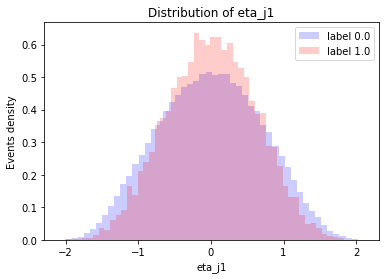

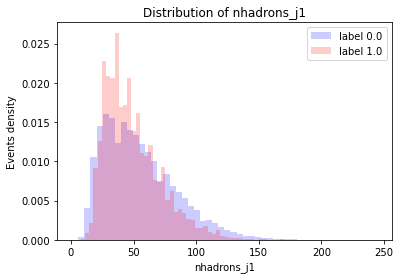

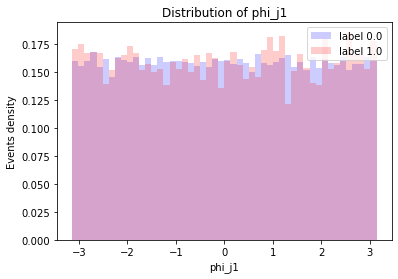

In [11]:
for variable in ['eta_j1', 'nhadrons_j1', 'phi_j1']:
    bkg_sig_hist(df, variable=variable, label='label')

Las distribuciones de $\eta$ y el número de hadrones que constituyen el jet principal son más angostas para la señal. El ángulo $\phi$ de los jets no presenta diferencias marcadas.

Los plots de las distribuciones de estas variables para el jet secundario son similares, pero el jet de señal posee menor $p_T$ y por lo tanto, menor energía.

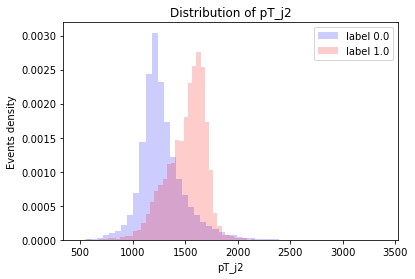

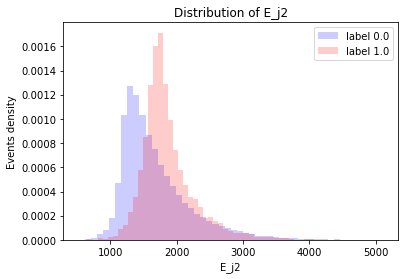

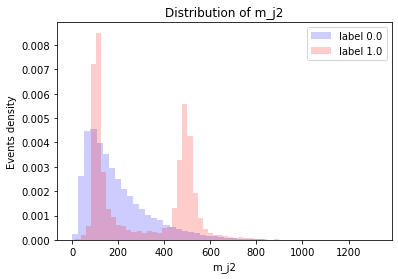

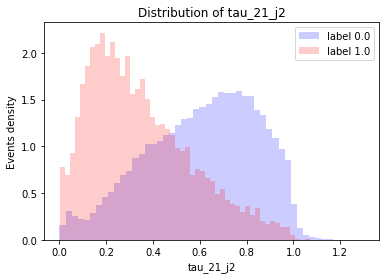

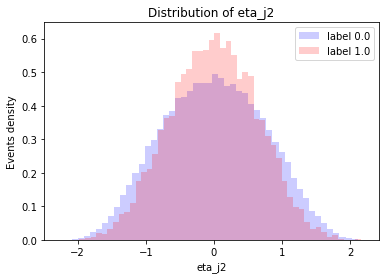

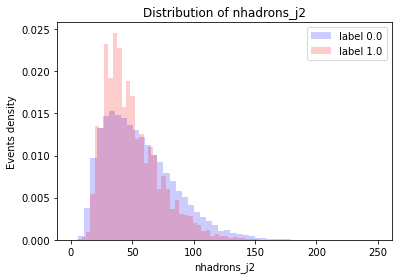

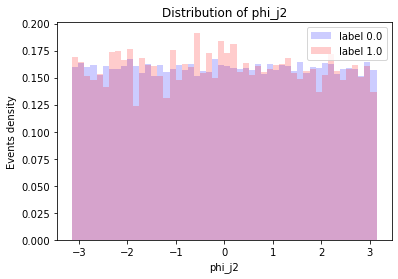

In [12]:
variables = ['pT_j2','E_j2', 'm_j2','tau_21_j2', 'eta_j2', 'nhadrons_j2', 'phi_j2']
for variable in variables:
    bkg_sig_hist(df, variable=variable, label='label')
    plt.show()

Por último, las variables que reprensentan una relación entre los dos jets principales también poseen diferencias,

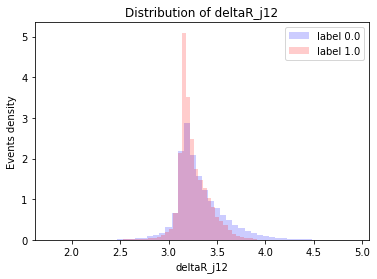

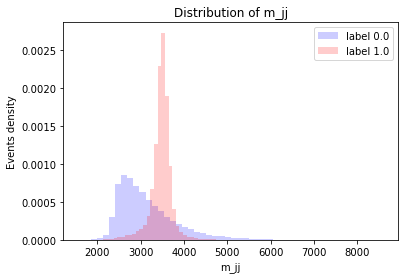

In [13]:
for variable in ['deltaR_j12','m_jj']:
    bkg_sig_hist(df, variable=variable, label='label')

La distribución de $\Delta R$ es más angosta para los eventos de señal. La masa invariante del fondo se encuentra entre 2000 y 3000 GeV, y decae suavemente, mientras que para la señal se observa un pico alrededor de 3500 GeV, consistente con la masa del bosón $Z'$ de nueva física para el evento de este conjunto de datos.

Aunque las variables de masa poseen diferentes distribuciones para señal y fondo y podrían ser de utilidad para que el modelo aprenda, no serán utilizadas. La idea es que la búsqueda sea lo más libre de modelo posible, por lo que no se desea que aprendan la distribución de masa.

### Correlaciones
La correlación de las variables que se utilizarán para entrenamiento se pueden observar a continuación.

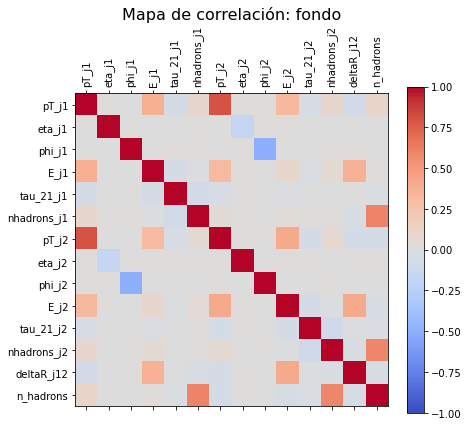

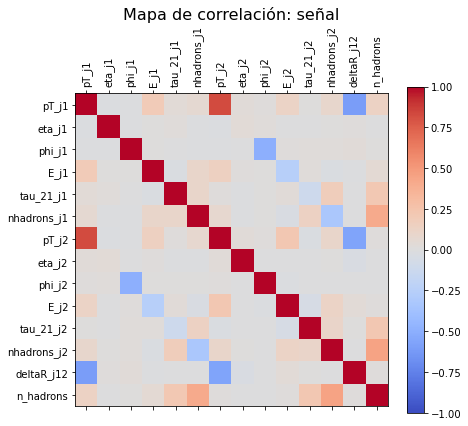

In [14]:
# Queremos tener las correlaciones para la señal y el fondo en dataframes separados
df_bkg = df[df['label']==0].drop(['label','m_jj','m_j1','m_j2'], axis=1)
df_sig = df[df['label']==1].drop(['label','m_jj','m_j1','m_j2'], axis=1)

# Calculamos las correlaciones
df_bkg_corr = df_bkg.corr()
df_sig_corr = df_sig.corr()

# Para graficar el mapa de correlaciones:
for name, corr in [('fondo', df_bkg_corr), ('señal', df_sig_corr)]:
    
    # Definimos figura y tamaño
    fig = plt.figure(figsize=[7,6])
    ax = fig.add_subplot(111)
    
    # Mapa de color
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    
    #Ejes
    ticks = np.arange(0,len(corr.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)
    
    # Título
    plt.title('Mapa de correlación: {}'.format(name), fontsize=16)
    plt.show()

La mayoría de las variables no están correlacionadas. Sin embargo, tanto para la señal como para el fondo el $p_T$ de los dos jets principales posee una correlación positiva y $\phi$ de ambos jets negativa. Para la señal, los $p_T$ de los jets principales presentan correlaciones negativas con $\Delta R$.

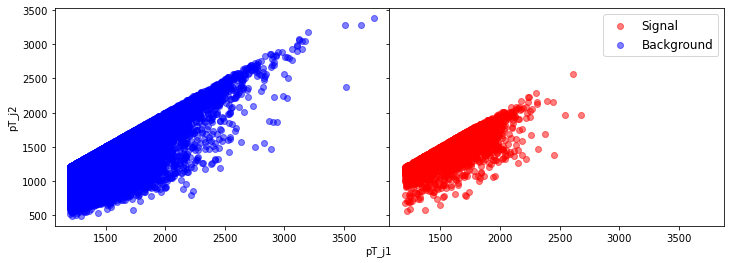

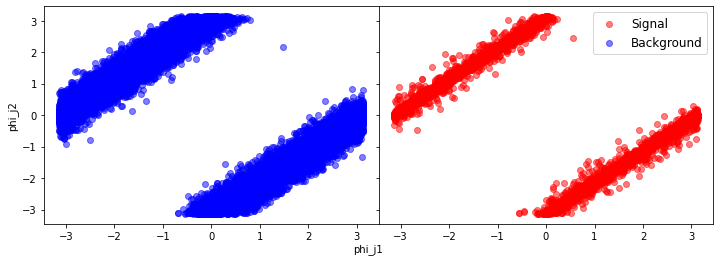

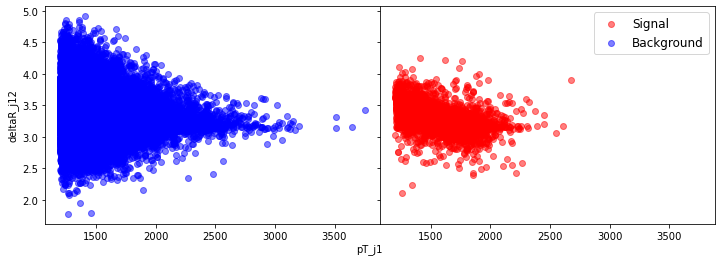

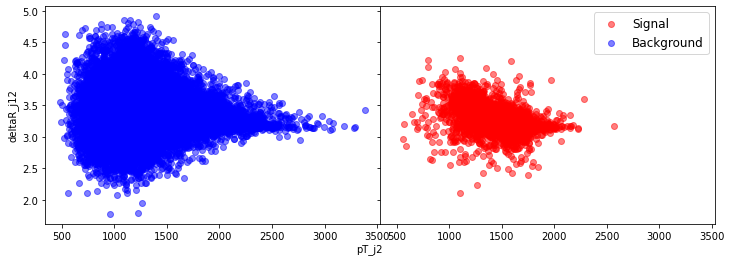

In [16]:
relations = [('pT_j1', 'pT_j2'), ('phi_j1', 'phi_j2'), ('pT_j1', 'deltaR_j12'), ('pT_j2', 'deltaR_j12')]
for x,y in relations:
    bkg_sig_scatter(df, x, y)
    plt.show()

La correlación del $p_T$ de los jets es lineal por la naturaleza del evento y del agrupamiento. Se escogieron como jets principales los más energéticos, por lo que el $p_T$ de los jets secundarios puede ser a lo sumo igual que el de los jets principales. Además, el momento de la colisión se distribuye de acuerdo a los dos productos principales que se formen, manteniendo una relación entre sí. 

Los valores de $\phi$ también presentan una correlación positiva por la naturaleza del evento. En los eventos dijet, los jets se generan en direcciones opuestas, por lo que la dirección angular del jet principal se relaciona con la del jet secundario. Las demás correlaciones no son evidentes en los gráficos.

La correlación de los datos puede generar problemas al utilizar algoritmos de aprendizaje automático para regresión. Sin embargo, debido a los modelos que se van a utilizar y a que la tarea es de clasificación, las consideraciones respecto a la correlación de las variables relacionadas al entrenamiento de los modelos no son necesarias.